# Neutrosophic Time Series Forecasting Algorithm

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

class NeutrosophicTimeSeries:
    def __init__(self, data, D1=5, D2=13, use_high_order=False, order=1):
        self.data = np.array(data)
        self.D1 = D1
        self.D2 = D2
        self.order = order if use_high_order else 1
        self.universe = None
        self.intervals = []
        self.nts_series = []
        self.relations = {}
        self.forecasted_values = []

    def _calculate_universe(self):
        Ds, Dl = np.min(self.data), np.max(self.data)
        self.universe = [Ds - self.D1, Dl + self.D2]

    def _define_intervals(self):
        abs_diffs = np.abs(np.diff(self.data))
        avg_diff = np.mean(abs_diffs) / 2
        if np.isnan(avg_diff) or avg_diff == 0:
            avg_diff = 1  # prevent division by zero or undefined base
        base = 10 ** int(np.log10(avg_diff))
        le = round(avg_diff / base) * base
        m = int((self.universe[1] - self.universe[0]) / le)

        self.intervals = []
        for i in range(m):
            low = self.universe[0] + i * le
            mid = low + le
            up = low + 2 * le
            T, I, F = 0.8, 0.1, 0.1
            self.intervals.append(((low, mid, up), (T, I, F)))

    def _compute_membership(self, x, triangle, params):
        n1, n2, n3 = triangle
        T, I, F = params
        if x < n1 or x > n3:
            return 0, 1, 1
        if n1 <= x <= n2:
            t_val = T * (x - n1) / (n2 - n1)
        else:
            t_val = T * (n3 - x) / (n3 - n2)

        if n1 <= x <= n2:
            i_val = ((n2 - x) + I * (x - n1)) / (n2 - n1)
        else:
            i_val = ((x - n2) + I * (n3 - x)) / (n3 - n2)

        if n1 <= x <= n2:
            f_val = ((n2 - x) + F * (x - n1)) / (n2 - n1)
        else:
            f_val = ((x - n2) + F * (n3 - x)) / (n3 - n2)

        return min(1, t_val), min(1, i_val), min(1, f_val)

    def _neutrosophication(self):
        for x in self.data:
            best_score = -np.inf
            best_index = None
            for idx, (triangle, params) in enumerate(self.intervals):
                T, I, F = self._compute_membership(x, triangle, params)
                score = 2 + T - I - F
                if score > best_score:
                    best_score = score
                    best_index = idx
            self.nts_series.append(best_index)

    def _build_relations(self):
        for i in range(len(self.nts_series) - self.order):
            key = tuple(self.nts_series[i:i+self.order])
            val = self.nts_series[i + self.order]
            if key not in self.relations:
                self.relations[key] = []
            self.relations[key].append(val)

    def _forecast(self):
        for i in range(len(self.nts_series)):
            if i < self.order:
                self.forecasted_values.append(None)
                continue
            key = tuple(self.nts_series[i - self.order:i])
            if key in self.relations:
                targets = self.relations[key]
                mid_vals = [self.intervals[j][0][1] for j in targets]
                forecast = np.mean(mid_vals)
            else:
                forecast = None
            self.forecasted_values.append(forecast)

    def predict(self):
        self._calculate_universe()
        self._define_intervals()
        self._neutrosophication()
        self._build_relations()
        self._forecast()
        return pd.DataFrame({
            "Actual": self.data,
            "Forecasted": self.forecasted_values
        })

    def evaluate(self):
        actual = np.array(self.data[self.order:])
        forecast = np.array([f for f in self.forecasted_values[self.order:] if f is not None])
        if len(actual) != len(forecast):
            return None
        rmse = np.sqrt(np.mean((forecast - actual)**2))
        afe = np.mean(np.abs(forecast - actual) / actual) * 100
        return {"RMSE": rmse, "AFE (%)": afe}


In [35]:
# Example usage
data = [13055, 13563, 13867, 14696, 15460, 15311, 15603, 15861, 16807]
nts_model = NeutrosophicTimeSeries(data, use_high_order=True, order=2)
df_result = nts_model.predict()
metrics = nts_model.evaluate()

print(df_result)
print(metrics)


   Actual  Forecasted
0   13055         NaN
1   13563         NaN
2   13867     13950.0
3   14696     14550.0
4   15460     15450.0
5   15311     15450.0
6   15603     15750.0
7   15861     15750.0
8   16807     16650.0
{'RMSE': 123.17525261651733, 'AFE (%)': 0.7343755533244146}


In [1]:
import os
path = 'C:\\Users\\dccha\\.cache\\kagglehub\\datasets\\sumanthvrao\\daily-climate-time-series-data\\versions\\3'
dataset_path = os.path.join(path, "DailyDelhiClimateTrain.csv")
print("The dataset is stored in : ",dataset_path)

The dataset is stored in :  C:\Users\dccha\.cache\kagglehub\datasets\sumanthvrao\daily-climate-time-series-data\versions\3\DailyDelhiClimateTrain.csv


In [2]:
import pandas as pd
data = pd.read_csv(dataset_path)

In [3]:
data['meantemp']

0       10.000000
1        7.400000
2        7.166667
3        8.666667
4        6.000000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [4]:
dataset = pd.DataFrame(data, columns=['date','meantemp'])

In [5]:
dataset.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [7]:
dataset.to_csv("my_data.csv", index=False)

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

class NeutrosophicTimeSeries:
    def __init__(self, csv_path, date_column, value_column, D1=5, D2=13, use_high_order=False, order=1):
        """
        Initialize the neutrosophic time series with the dataset.
        Args:
            csv_path: Path to CSV file.
            date_column: Name of the date column in the dataset.
            value_column: Name of the value column to forecast.
            D1, D2: Extension constants for defining the universe.
            use_high_order: Whether to use high-order NTS.
            order: Order of the model if high-order is used.
        """
        df = pd.read_csv(csv_path, parse_dates=[date_column])
        self.dates = df[date_column].values
        self.data = df[value_column].astype(float).values
        self.D1 = D1
        self.D2 = D2
        self.order = order if use_high_order else 1
        self.universe = None
        self.intervals = []
        self.nts_series = []
        self.relations = {}
        self.forecasted_values = []

    def _calculate_universe(self):
        # Determine the universe based on the min and max values with buffers D1, D2
        Ds, Dl = np.min(self.data), np.max(self.data)
        self.universe = [Ds - self.D1, Dl + self.D2]

    def _define_intervals(self):
        # Automatically determine suitable interval length
        abs_diffs = np.abs(np.diff(self.data))
        avg_diff = np.mean(abs_diffs) / 2
        if np.isnan(avg_diff) or avg_diff == 0:
            avg_diff = 1  # Avoid invalid intervals
        base = 10 ** int(np.log10(avg_diff))
        le = round(avg_diff / base) * base
        if le == 0:
            le = 1
        m = max(1, int((self.universe[1] - self.universe[0]) / le))

        # Build triangular neutrosophic intervals
        self.intervals = []
        for i in range(m):
            low = self.universe[0] + i * le
            mid = low + le
            up = low + 2 * le
            T, I, F = 0.8, 0.1, 0.1
            self.intervals.append(((low, mid, up), (T, I, F)))

    def _compute_membership(self, x, triangle, params):
        # Calculate T, I, F degrees for a data point x within the triangle range
        n1, n2, n3 = triangle
        T, I, F = params
        if x < n1 or x > n3:
            return 0, 1, 1
        if n1 <= x <= n2:
            t_val = T * (x - n1) / (n2 - n1)
        else:
            t_val = T * (n3 - x) / (n3 - n2)

        if n1 <= x <= n2:
            i_val = ((n2 - x) + I * (x - n1)) / (n2 - n1)
        else:
            i_val = ((x - n2) + I * (n3 - x)) / (n3 - n2)

        if n1 <= x <= n2:
            f_val = ((n2 - x) + F * (x - n1)) / (n2 - n1)
        else:
            f_val = ((x - n2) + F * (n3 - x)) / (n3 - n2)

        return min(1, t_val), min(1, i_val), min(1, f_val)

    def _neutrosophication(self):
        # Assign each data point to the most suitable neutrosophic interval using score
        for x in self.data:
            best_score = -np.inf
            best_index = None
            for idx, (triangle, params) in enumerate(self.intervals):
                T, I, F = self._compute_membership(x, triangle, params)
                score = 2 + T - I - F
                if score > best_score:
                    best_score = score
                    best_index = idx
            self.nts_series.append(best_index)

    def _build_relations(self):
        # Build neutrosophic logical relationship groups (NLRGs)
        for i in range(len(self.nts_series) - self.order):
            key = tuple(self.nts_series[i:i+self.order])
            val = self.nts_series[i + self.order]
            if key not in self.relations:
                self.relations[key] = []
            self.relations[key].append(val)

    def _forecast(self):
        # Use NLRGs to produce forecast values
        for i in range(len(self.nts_series)):
            if i < self.order:
                self.forecasted_values.append(np.nan)
                continue
            key = tuple(self.nts_series[i - self.order:i])
            if key in self.relations:
                targets = self.relations[key]
                mid_vals = [self.intervals[j][0][1] for j in targets if j is not None and j < len(self.intervals)]
                forecast = np.mean(mid_vals) if mid_vals else np.nan
            else:
                forecast = np.nan
            self.forecasted_values.append(forecast)

    def predict(self):
        # Full pipeline: preprocess, build model, forecast
        self._calculate_universe()
        self._define_intervals()
        self._neutrosophication()
        self._build_relations()
        self._forecast()
        return pd.DataFrame({
            "Date": self.dates,
            "Actual": self.data,
            "Forecasted": self.forecasted_values
        })

    def evaluate(self):
        # Compute RMSE and AFE evaluation metrics
        actual = np.array(self.data[self.order:])
        forecast = np.array(self.forecasted_values[self.order:], dtype=np.float64)
        mask = ~np.isnan(forecast)
        if np.sum(mask) == 0:
            return None
        rmse = np.sqrt(np.mean((forecast[mask] - actual[mask])**2))
        afe = np.mean(np.abs(forecast[mask] - actual[mask]) / actual[mask]) * 100
        return {"RMSE": rmse, "AFE (%)": afe}

In [17]:
nts = NeutrosophicTimeSeries(
    csv_path="./my_data.csv",
    date_column="date",
    value_column="meantemp",
    use_high_order=True,
    order=5
)

forecast_df = nts.predict()
print(forecast_df)

metrics = nts.evaluate()
print(metrics)


           Date     Actual  Forecasted
0    2013-01-01  10.000000         NaN
1    2013-01-02   7.400000         NaN
2    2013-01-03   7.166667         NaN
3    2013-01-04   8.666667         NaN
4    2013-01-05   6.000000         NaN
...         ...        ...         ...
1457 2016-12-28  17.217391        17.0
1458 2016-12-29  15.238095        15.0
1459 2016-12-30  14.095238        14.0
1460 2016-12-31  15.052632        15.0
1461 2017-01-01  10.000000        12.0

[1462 rows x 3 columns]
{'RMSE': 0.44469143367561637, 'AFE (%)': 1.3525261800674049}


In [18]:
import matplotlib.pyplot as plt

def plot_forecast(df, date_col='Date', actual_col='Actual', forecast_col='Forecasted'):
    """
    Plots the actual and forecasted values over time.

    Args:
        df: DataFrame containing Date, Actual, and Forecasted columns.
        date_col: Column name for dates.
        actual_col: Column name for actual values.
        forecast_col: Column name for forecasted values.
    """
    plt.figure(figsize=(14, 6))
    plt.plot(df[date_col], df[actual_col], label='Actual', marker='o')
    plt.plot(df[date_col], df[forecast_col], label='Forecasted', marker='x')
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Actual vs Forecasted over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


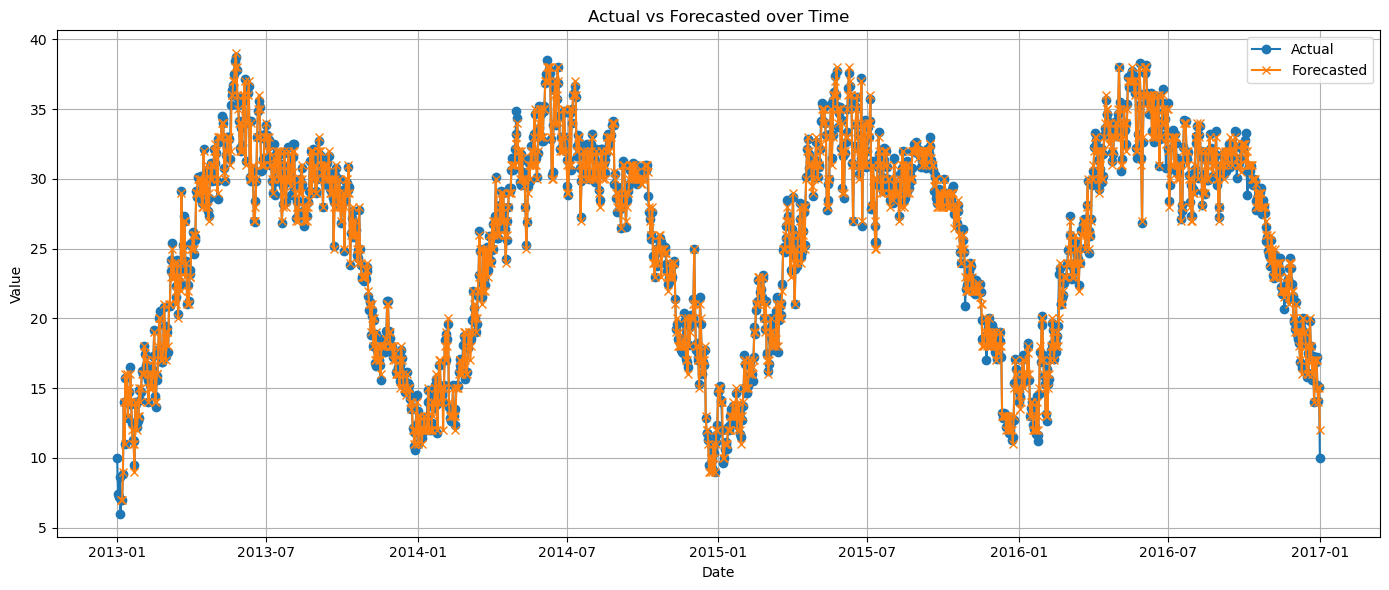

In [19]:
# Example call after prediction
plot_forecast(forecast_df)